In [1]:
import pandas as pd

In [2]:
doc = pd.read_csv('./output/contents.csv')

In [3]:
doc.head()

,index,contents
0,1,"CLINICAL MICROBIOLOGY REVIEWS , Oct. 2004, p. ..."
1,2,Leading Edge\nPrimer\nBenchmarking Metagenomic...
2,3,Narrative Reviews\nComputational biology: Role...
3,4,Contents lists available atScienceDirect\nMicr...
4,5,Review\nWhole genome sequencing options for ba...


In [4]:
doc.isnull().sum()

index       0
contents    0
dtype: int64

In [5]:
#doc.drop(columns=['PMCID', 'NIHMS ID', 'DOI'], inplace=True) #not necessary but useful if the empty columns causes issues

In [6]:
doc.shape

(80, 2)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(max_df=0.9, stop_words='english')

In [9]:
dtm = cv.fit_transform(doc['contents'])

In [10]:
dtm

<80x9723 sparse matrix of type '<class 'numpy.int64'>'
	with 21864 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
LDA = LatentDirichletAllocation(n_components=5,random_state=19)

In [35]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=19)

In [36]:
for i, topic in enumerate(LDA.components_):
    print(f'The top twenty words for Topic #{i}')
    print([cv.get_feature_names_out()[subject] for subject in topic.argsort()[-20:]])
    print('\n')

The top twenty words for Topic #0
['fr', 'org', 'zt', 'taxonomic', 'kraken', 'strains', '10', 'kzn', 'analysis', '16s', 'rrna', 'bacterial', 'diversity', 'article', 'gene', 'ok', 'microbiology', 'zo', 'species', 'university']


The top twenty words for Topic #1
['used', 'core', 'article', 'sequences', '10', 'sequence', 'usa', '16s', 'genomes', 'genes', 'gene', 'analysis', 'university', 'et', 'learning', 'data', 'al', 'sequencing', 'species', 'genome']


The top twenty words for Topic #2
['database', 'bacterial', 'reference', 'genome', 'doi', 'sequencing', 'sequence', 'org', 'machine', 'singapore', 'university', 'metagenomic', '2021', 'pathogens', 'nasal', 'surveillance', 'based', '10', 'deep', 'learning']


The top twenty words for Topic #3
['com', 'identiﬁcation', 'environmental', 'melioidosis', 'health', 'university', 'soil', 'doi', 'disease', 'article', 'https', 'burkholderia', 'sequencing', 'species', 'org', 'analysis', 'based', '2022', '10', 'pseudomallei']


The top twenty words 

In [37]:
topic_results = LDA.transform(dtm)

In [38]:
topic_results[0].argmax()

0

In [39]:
doc['Topic'] = topic_results.argmax(axis=1)

In [40]:
doc.head()

,index,contents,Topic
0,1,"CLINICAL MICROBIOLOGY REVIEWS , Oct. 2004, p. ...",0
1,2,Leading Edge\nPrimer\nBenchmarking Metagenomic...,1
2,3,Narrative Reviews\nComputational biology: Role...,1
3,4,Contents lists available atScienceDirect\nMicr...,3
4,5,Review\nWhole genome sequencing options for ba...,1


In [41]:
%matplotlib inline

import matplotlib.pyplot as plt

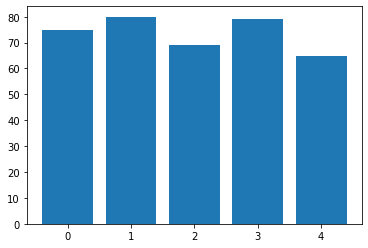

In [42]:
plt.bar(doc['Topic'], doc['index'])
plt.show()

In [ ]:
#future improvements:
#relevant stop words
#options for stop words